<a href="https://colab.research.google.com/github/BP0313430/Test-Repository2/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix




In [ ]:
# Install kagglehub for api:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

# Set the dataset handle and the path to the csv file for the dataset
dataset_handle = "fazelsamar/merged-red-and-white-wine-quality-study"
file_path_within_dataset = "wine_quality_merged.csv"

# Load the latest version using dataset_load
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  dataset_handle, # Pass the dataset handle
  path=file_path_within_dataset, # Pass the path to the file within the dataset

)

print("First 5 records:", df.head())

100%|██████████| 405k/405k [00:00<00:00, 2.99MB/s]

First 5 records: 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

In [ ]:
df.head() # inspect top of dataset



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.tail() # inspect bottom of dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [ ]:
df.isna().sum() # check dataset for null values

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
score_counts = df['quality'].value_counts().sort_index()
print(score_counts)

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='Count'>

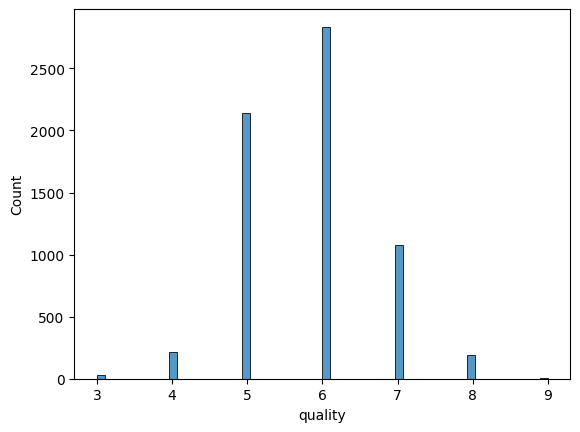

In [ ]:
sns.histplot(data = df, x ="quality")

In [ ]:
# Define a binning function
def bin_quality(score):
    if score <= 5:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'

# Apply the binning function
df['quality_bin'] = df['quality'].apply(bin_quality)

# Count the number of wines in each bin
bin_counts = df['quality_bin'].value_counts()

print(bin_counts)


quality_bin
Medium    3915
Low       2384
High       198
Name: count, dtype: int64


In [ ]:
# one hot encode the wine type, for use in the model
df_encoded = pd.get_dummies(df, columns=['type'])


In [ ]:
# check for duplicates
df_encoded.duplicated().sum()
df_encoded[df_encoded.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin,type_red,type_white
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,Low,True,False
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,Low,True,False
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,Low,True,False
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,Low,True,False
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,Low,False,True
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,Medium,False,True
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,Low,False,True
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,Medium,False,True


In [ ]:
# create new dataframe with quality column dropped to avoid data leakage
df_model = df_encoded.drop(columns=['quality'])

In [ ]:
df_model.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin,type_red,type_white,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,True,False,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low,True,False,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low,True,False,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,True,False,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,True,False,red


# **Distribution of Target Variable**

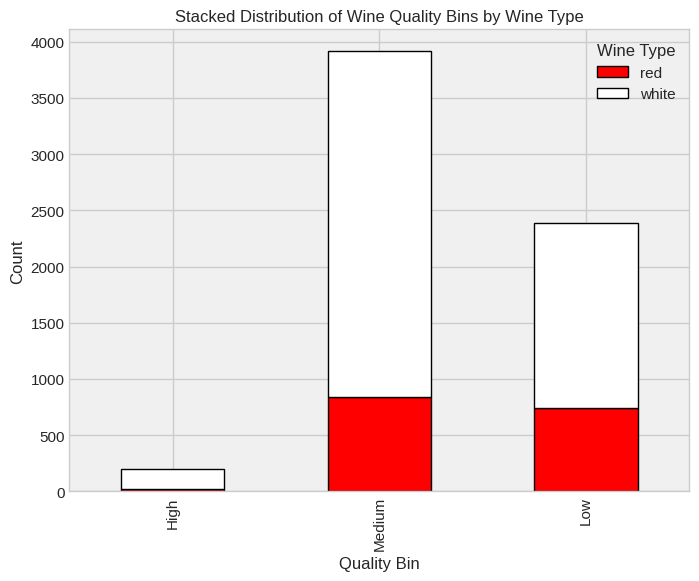

In [ ]:



# Set a light grey background
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.facecolor'] = '#f0f0f0'   # light grey background

ct.plot(kind='bar', stacked=True, figsize=(8,6), color=['red','white'], edgecolor='black')

plt.title("Stacked Distribution of Wine Quality Bins by Wine Type")
plt.xlabel("Quality Bin")
plt.ylabel("Count")
plt.legend(title="Wine Type")
plt.show()

# **Correlation Matrix**

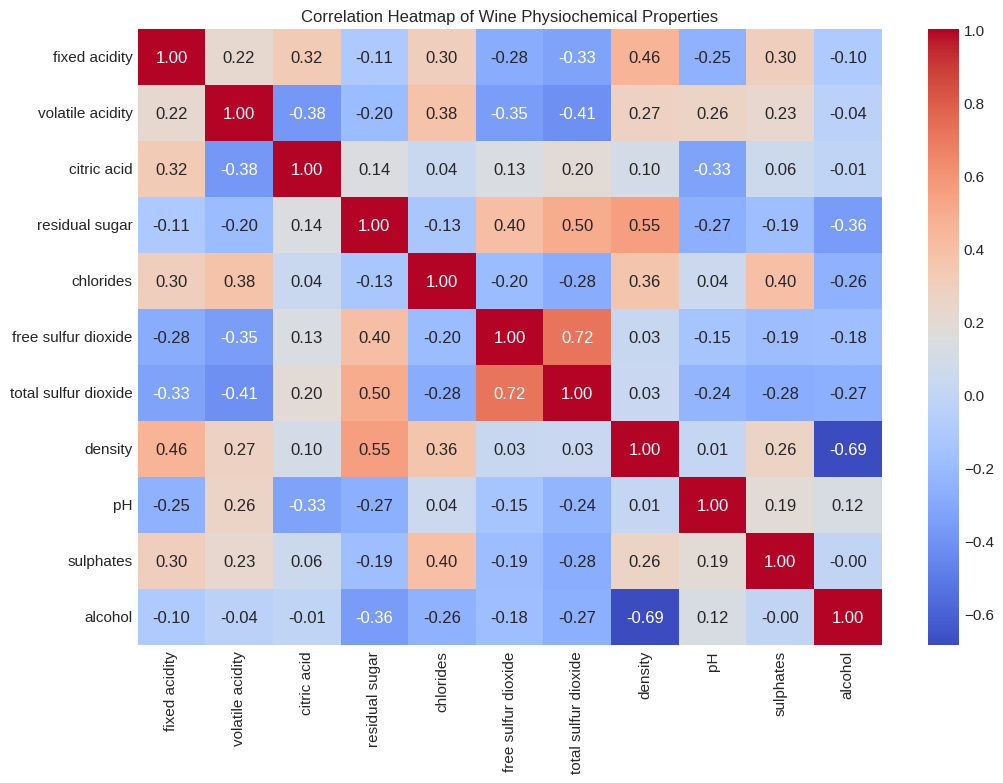

In [ ]:
# Drop unnecessary columns: target + one-hot encoded wine type
cols_to_drop = ['quality_bin', 'type_red', 'type_white', 'wine_type']
df_corr = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])

# Compute correlation matrix
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title("Correlation Heatmap of Wine Physiochemical Properties")
plt.show()





Boxplot for Alcohol versus Quality


/tmp/ipython-input-4124474996.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='quality_bin', y='alcohol', order=order,


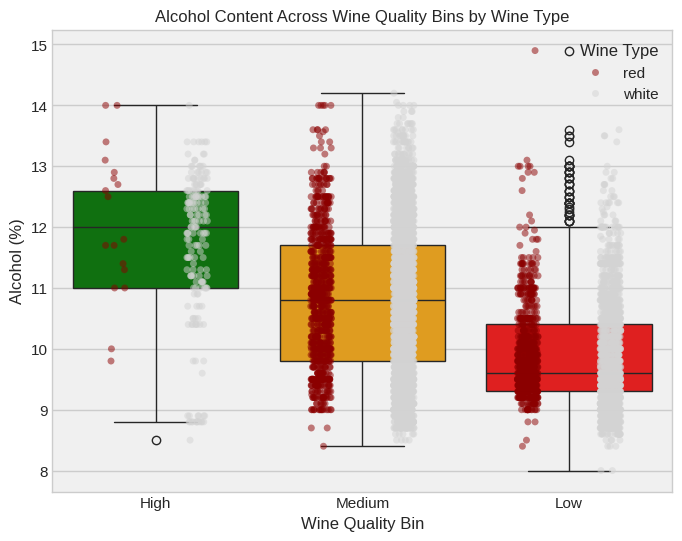

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure bins are ordered High → Medium → Low
order = ['High', 'Medium', 'Low']

plt.figure(figsize=(8,6))

# Boxplot for alcohol distribution by quality_bin
sns.boxplot(data=df_model, x='quality_bin', y='alcohol', order=order,
            palette={'High':'green','Medium':'orange','Low':'red'})

# Stripplot overlay, colored by wine_type
sns.stripplot(data=df_model, x='quality_bin', y='alcohol', order=order,
              hue='wine_type', dodge=True, jitter=True, alpha=0.5,
              palette={'red':'darkred','white':'lightgrey'})

plt.title("Alcohol Content Across Wine Quality Bins by Wine Type")
plt.xlabel("Wine Quality Bin")
plt.ylabel("Alcohol (%)")
plt.legend(title="Wine Type")
plt.show()


# **Density against Quality and Alcohol**

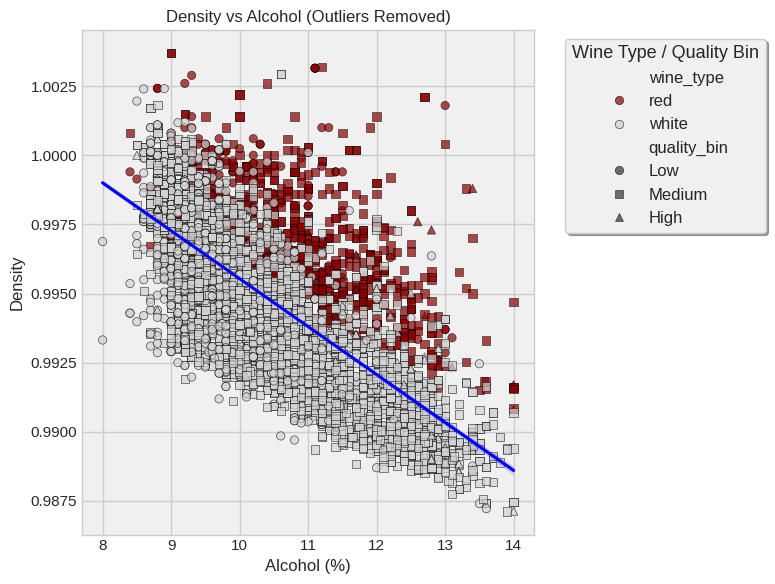

In [ ]:

# Define IQR-based outlier removal for alcohol and density
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to both alcohol and density
df_filtered = remove_outliers(df_model, 'alcohol')
df_filtered = remove_outliers(df_filtered, 'density')

# Define wine colors and quality markers
wine_colors = {'red': '#8B0000', 'white': '#D3D3D3'}
quality_markers = {'Low': 'o', 'Medium': 's', 'High': '^'}

plt.figure(figsize=(8,6))

# Scatterplot with wine_type as color and quality_bin as marker
sns.scatterplot(data=df_filtered, x='alcohol', y='density',
                hue='wine_type', style='quality_bin',
                palette=wine_colors, markers=quality_markers,
                alpha=0.7, edgecolor='black')

# Regression line (overall trend)
sns.regplot(data=df_filtered, x='alcohol', y='density',
            scatter=False, color='blue', line_kws={'label':'Regression Line'})

plt.title("Density vs Alcohol (Outliers Removed)")
plt.xlabel("Alcohol (%)")
plt.legend(title="Wine Type / Quality Bin", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13, frameon=True, shadow=True)
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Build Models


In [ ]:
# Create a new DataFrame without the 'wine_type' column
df = df_model.drop(columns=['wine_type'])

# Quick check of the new DataFrame
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality_bin  type_red  type_white  
0      9.4         Low      True       

## Build Train/Test


Split the data into training and testing sets, using the features  as independent variables (X) and `quality_bin` as the dependent variable (y).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Features and target
X = df.drop(columns=['quality_bin'])
y = df['quality_bin']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify continuous columns (exclude one-hot encoded type_red/type_white)
continuous_cols = [col for col in X_train.columns if col not in ['type_red', 'type_white']]

# Scale continuous features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Original training set shape:", X_train.shape, y_train.value_counts().to_dict())
print("Resampled training set shape:", X_train_resampled.shape, pd.Series(y_train_resampled).value_counts().to_dict())

Original training set shape: (5197, 13) {'Medium': 3132, 'Low': 1907, 'High': 158}
Resampled training set shape: (9396, 13) {'Medium': 3132, 'Low': 3132, 'High': 3132}


In [ ]:


print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Also check red/white balance within each quality bin
resampled_df = X_train_resampled.copy()
resampled_df['quality_bin'] = y_train_resampled
print("\nRed/White counts per quality bin after SMOTE:")
print(resampled_df.groupby(['quality_bin'])[['type_red','type_white']].sum())

Before SMOTE:
quality_bin
Medium    3132
Low       1907
High       158
Name: count, dtype: int64

After SMOTE:
quality_bin
Medium    3132
Low       3132
High      3132
Name: count, dtype: int64

Red/White counts per quality bin after SMOTE:
             type_red  type_white
quality_bin                      
High              311        2845
Low              1003        2136
Medium            686        2446


In [ ]:
import pandas as pd

# --- Pre-SMOTE balance ---
pre_red = (X_train['type_red'] == 1).sum()
pre_white = (X_train['type_white'] == 1).sum()
pre_total = pre_red + pre_white

pre_red_pct = pre_red / pre_total * 100
pre_white_pct = pre_white / pre_total * 100

# --- Post-SMOTE balance ---
post_red = (X_train_resampled['type_red'] == 1).sum()
post_white = (X_train_resampled['type_white'] == 1).sum()
post_total = post_red + post_white

post_red_pct = post_red / post_total * 100
post_white_pct = post_white / post_total * 100

# --- Summary table ---
balance_summary = pd.DataFrame({
    'Set': ['Pre-SMOTE', 'Post-SMOTE'],
    'Red Count': [pre_red, post_red],
    'White Count': [pre_white, post_white],
    'Red %': [round(pre_red_pct, 2), round(post_red_pct, 2)],
    'White %': [round(pre_white_pct, 2), round(post_white_pct, 2)]
})

print(balance_summary)

          Set  Red Count  White Count  Red %  White %
0   Pre-SMOTE       1307         3890  25.15    74.85
1  Post-SMOTE       2000         7427  21.22    78.78


**Reasoning**:
The 'type' column was already one-hot encoded and dropped in a previous step, so it's not present in the dataframe. I need to remove 'type' from the list of columns to drop.



## Train model



In [ ]:
# Train logistic regression on SMOTE-resampled training set
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)


# Predictions on the untouched test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Interpret coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': log_reg.coef_[0]  # for multinomial, inspect each row of coef_
})

# Sort by absolute impact
coefficients = pd.DataFrame({
    'Feature': [col for col in X_train_resampled.columns if col not in ['type_red','type_white']],
    'Coefficient': log_reg.coef_[0][[i for i, col in enumerate(X_train_resampled.columns) if col not in ['type_red','type_white']]]
})

print("\nTop Features Driving Wine Quality:\n", coefficients.head(10))



Classification Report:
               precision    recall  f1-score   support

        High       0.08      0.60      0.14        40
         Low       0.62      0.73      0.67       477
      Medium       0.75      0.42      0.54       783

    accuracy                           0.54      1300
   macro avg       0.48      0.58      0.45      1300
weighted avg       0.68      0.54      0.57      1300

Confusion Matrix:
 [[ 24   5  11]
 [ 28 348 101]
 [241 212 330]]

Top Features Driving Wine Quality:
                 Feature  Coefficient
0         fixed acidity     0.476011
1      volatile acidity    -0.543416
2           citric acid    -0.032703
3        residual sugar     0.949765
4             chlorides    -0.040688
5   free sulfur dioxide     0.271195
6  total sulfur dioxide    -0.254400
7               density    -0.938082
8                    pH     0.251364
9             sulphates     0.173336


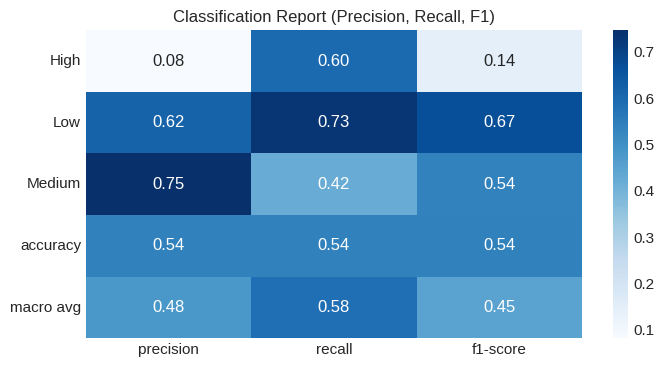

In [ ]:
# --- Classification Report as a DataFrame ---
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1)")
plt.yticks(rotation=0)
plt.show()



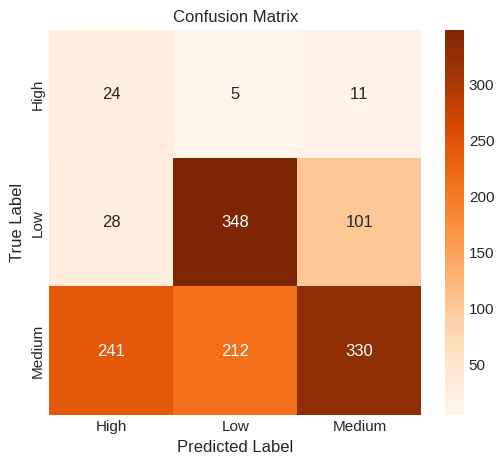

In [ ]:
# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=log_reg.classes_, columns=log_reg.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


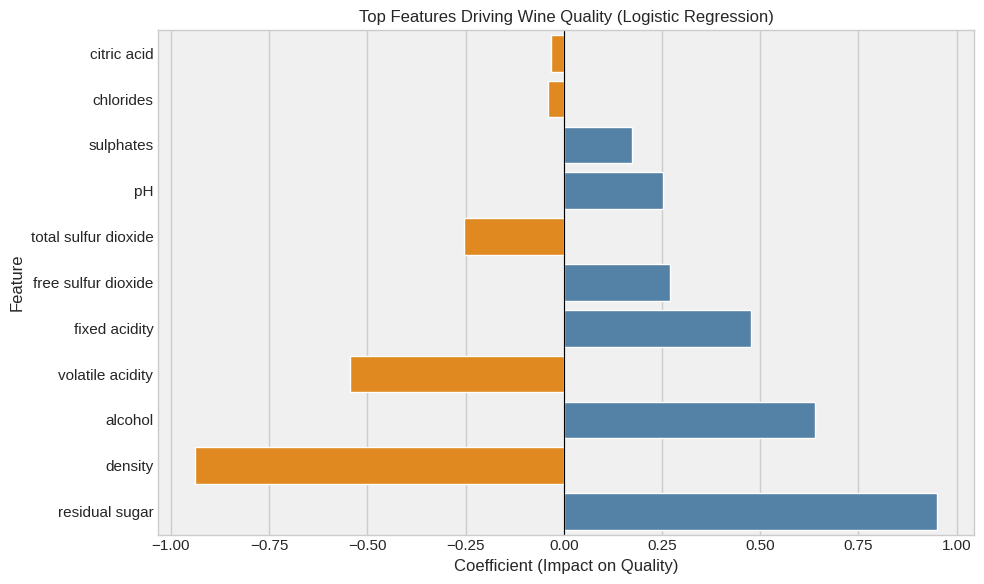

In [ ]:
# Add a column for sign (positive vs negative)
coefficients['Sign'] = coefficients['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Add a column for absolute coefficient
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()

# Sort by absolute coefficient
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=True)

# Plot with hue based on sign
plt.figure(figsize=(10,6))
sns.barplot(
    data=coefficients,
    x='Coefficient',
    y='Feature',
    hue='Sign',
    dodge=False,
    palette={'Positive':'steelblue','Negative':'darkorange'},
    legend=False
)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Top Features Driving Wine Quality (Logistic Regression)")
plt.xlabel("Coefficient (Impact on Quality)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()